In [20]:
from schrodi import *
import matplotlib.pyplot as plt
from pandas import DataFrame
from numpy import arange

x = linspace(-L,L,6000)

# Barrera de potencial $V_0 = 1$ eV
Començarem trobant l'espectre d'energies pròpies del hamiltonià.
Es representen en la taula següent.

In [21]:
E = find_states()
data = {'Valors propis Hamiltonià':E}
DataFrame(data)

,Valors propis Hamiltonià
0,0.0120
1,0.0120
2,0.0480
3,0.0480
4,0.1078
5,0.1079
6,0.1914
7,0.1916
8,0.2985
9,0.2989


A continuació representem gràficament algunes de les funciones d'ona - no normalitzades encara - pròpies del hamilonià. Primer pel cas $\varphi$ parell, després pel cas $\varphi$ senar.

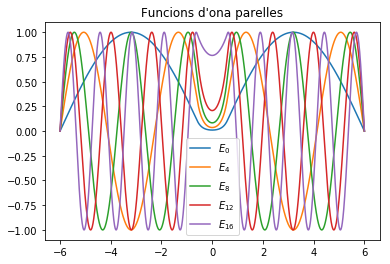

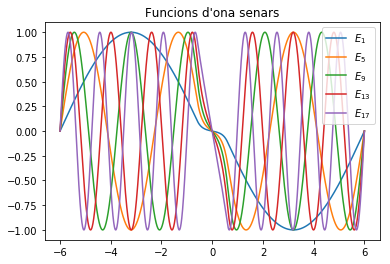

In [22]:
for i in range(0,5):
    plt.plot(x,phi_even(x,E[4*i]),
                       label = '$E_{%i}$' % (4*i))
    plt.legend()
plt.title("Funcions d'ona parelles")
plt.show()

for i in range(0,5):
    plt.plot(x,phi_odd(x,E[4*i+1]),
                       label = '$E_{%i}$' % (4*i+1))
    plt.legend()
plt.title("Funcions d'ona senars")
plt.show()

Representem - i normalitzem - el nostre paquet gaussià. També guardem en una matriu les funcions d'ona de la nostra base.

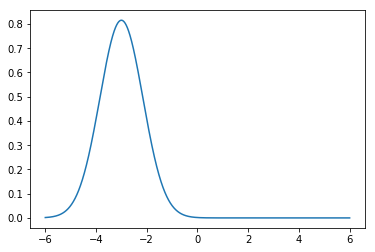

In [23]:
gauss = gaussian(x)/sqrt(quad(lambda x: (gaussian(x))**2,-L,L)[0])
plt.plot(x,gauss)
plt.show()

phi_basis = evaluate_wavefunction(x,E)

Ara podem aplicar l'operador "patada" a la nostra funció d'ona inicial. Treballarem amb nombres complexos.

In [24]:
phi_init = exp(1j*k*sqrt(T)*x)*gauss # Complex numbers array

Ara podem expressar $\texttt{phi_init}$ com a combinació lineal de les fucions d'ona de $\texttt{phi_basis}$. Per això trobem els coeficients emprant $\texttt{basis_coefficients}$. Aquests coeficients seran nombres complexos en general.

In [25]:
cn = basis_coefficients(phi_basis,phi_init,x)

In [26]:
# Estudiem la contribució de cada funció pròpia. 
# Podem veure si hem agafat suficients valors propis de H
from numpy import conj, real
dn = []
for i in cn:
    dn.append(real(i*conj(i)))
# dn
# Resultats coherents, OK!

Comprovem que el codi funciona. Reconstruïm la gaussiana pre-patada.

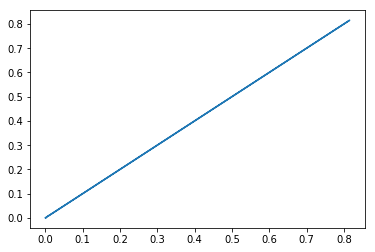

In [27]:
cnbis = basis_coefficients(phi_basis, gauss, x)
gauss_rec = sum( [cnbis[i]*phi_basis[i] for i in range(0,len(phi_basis)) ] )
plt.plot(gauss,gauss_rec)
#plt.plot(x,gauss)
plt.show()
# Perfecte!

Ara simplement queda veure com evoluciona amb el temps la nostra funció d'ona inicial!

In [75]:
def phi_time_evolved(t):
    return time_evolve(x, phi_basis, cn, E, t)
t = arange(0,10,0.5)
phi_time = zeros((len(t),len(phi_basis[0])),dtype=complex)
phi_density = zeros((len(t),len(phi_basis[0])))
for i in range(0,len(t)):
    phi_time[i] = phi_time_evolved(t[i])
    phi_density[i] = real(phi_time[i]*conj(phi_time[i]))
from matplotlib import animation
from IPython.display import HTML
from matplotlib import rcParams

In [76]:
rcParams['animation.writer'] = 'avconv'
fig = plt.figure()
ax = plt.axes(xlim=(-L, L), ylim=(0,1))
line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,

def animate(i):
    y = phi_density[i]
    line.set_data(x, y)
    return line,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=20, blit=True)
HTML(anim.to_html5_video())

KeyError: 'avconv'

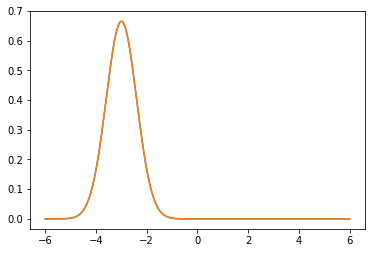

In [52]:
plt.plot(x,phi_density[0])
plt.show()